In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
regression_df = pd.read_csv("regression_df_official.csv")

In [46]:
regression_df.shape

(1023, 56)

In [52]:
df = regression_df.copy()

# ========== 1. Define Columns to Lag ==========
country_cols = ['SG', 'CZ', 'AE', 'MY', 'CN', 'FR', 'NL']
growth_cols = ['growth_SG', 'growth_CZ', 'growth_AE', 'growth_MY', 'growth_CN']
rolling_cols = ['rolling7', 'rolling14', 'rolling30',
                'rolling7_SG', 'rolling7_CZ', 'rolling7_AE', 'rolling7_MY', 'rolling7_CN']
share_cols = ['share_SG', 'share_CZ', 'share_AE', 'share_MY', 'share_CN']
other_to_shift = ['china_rolling7_std', 'total_china_rerouted', 'dominant_country', 'growth_rate']

# ========== 2. Add lags 2-6 for package_count only ==========
for l in range(2, 7):
    df[f'lag{l}'] = df['package_count'].shift(l)

# ========== 3. Shift all rollings, growths, shares, stds, total reroute, dominant_country, growth_rate, and countries (lag1 only) ==========
for col in country_cols + growth_cols + rolling_cols + share_cols + other_to_shift:
    df[f'{col}_lag1'] = df[col].shift(1)

# ========== 4. Drop forbidden columns ==========
drop_cols = [
    'date',                 # Don't use as feature
    'package_count',        # Target only!
    'is_open_day',
    'is_big_jump',
    'is_outlier',
    'is_iqr_outlier'
]

# These features are now replaced by lagged versions, so you can drop their original version
drop_cols += country_cols + growth_cols + rolling_cols + share_cols + other_to_shift

# ========== 5. Final Feature Selection ==========
# List of features to keep directly (not shifted)
direct_feats = [
    'day_of_week', 'is_friday', 'is_holiday', 'is_after_holiday', 'is_manual_closure', 'is_closed_day',
    'is_post_event_window', 'day_after_closed', 'month', 'day_of_year', 'weekofyear', 'is_promo_day',
    'days_since_promo', 'is_active_SG', 'is_active_CZ', 'is_active_AE', 'is_active_MY', 'is_active_CN',
    'n_active_china_routes'
]

# Build final features list: all direct features + all new lagged features
feature_cols = direct_feats + [c for c in df.columns if (
    ('lag' in c or '_lag1' in c) and c not in drop_cols
)]

# ========== 6. Build X (features) and y (target) ==========
X = df[feature_cols].copy()
y = df['package_count'].shift(-1)   # Predicting next day's package_count

# ========== 7. Optional: Drop NA rows from shifting ==========
X = X.iloc[6:]   # remove early rows where lags are NA (up to lag6)
y = y.iloc[6:]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()


Features shape: (1017, 55)
Target shape: (1017,)


,day_of_week,is_friday,is_holiday,is_after_holiday,is_manual_closure,is_closed_day,is_post_event_window,day_after_closed,month,day_of_year,...,rolling7_CN_lag1,share_SG_lag1,share_CZ_lag1,share_AE_lag1,share_MY_lag1,share_CN_lag1,china_rolling7_std_lag1,total_china_rerouted_lag1,dominant_country_lag1,growth_rate_lag1
6,0,0,0,0,0,0,0,0,1,10,...,0.333333,0.834866,0.158125,0.006132,0.000000,0.000876,867.224711,2283.0,SG,2.868908
7,1,0,0,0,0,0,0,0,1,11,...,0.285714,0.001079,0.935275,0.005933,0.057713,0.000000,916.642320,1854.0,CZ,-0.124240
8,3,0,0,0,0,0,0,0,1,13,...,0.428571,0.000000,0.983607,0.000000,0.000000,0.016393,907.949967,61.0,CZ,-0.951885
9,5,0,0,0,0,0,0,0,1,15,...,0.428571,0.000000,0.960622,0.000972,0.038405,0.000000,932.800571,2057.0,CZ,20.701031
10,6,0,0,0,0,0,0,0,1,16,...,0.428571,0.982520,0.001279,0.000213,0.015988,0.000000,1541.744945,4691.0,SG,1.999050


In [53]:
X.columns

Index(['day_of_week', 'is_friday', 'is_holiday', 'is_after_holiday',
       'is_manual_closure', 'is_closed_day', 'is_post_event_window',
       'day_after_closed', 'month', 'day_of_year', 'weekofyear',
       'is_promo_day', 'days_since_promo', 'is_active_SG', 'is_active_CZ',
       'is_active_AE', 'is_active_MY', 'is_active_CN', 'n_active_china_routes',
       'lag1', 'lag7', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'SG_lag1',
       'CZ_lag1', 'AE_lag1', 'MY_lag1', 'CN_lag1', 'FR_lag1', 'NL_lag1',
       'growth_SG_lag1', 'growth_CZ_lag1', 'growth_AE_lag1', 'growth_MY_lag1',
       'growth_CN_lag1', 'rolling7_lag1', 'rolling14_lag1', 'rolling30_lag1',
       'rolling7_SG_lag1', 'rolling7_CZ_lag1', 'rolling7_AE_lag1',
       'rolling7_MY_lag1', 'rolling7_CN_lag1', 'share_SG_lag1',
       'share_CZ_lag1', 'share_AE_lag1', 'share_MY_lag1', 'share_CN_lag1',
       'china_rolling7_std_lag1', 'total_china_rerouted_lag1',
       'dominant_country_lag1', 'growth_rate_lag1'],
      dtype='obj

In [54]:
X.shape

(1017, 55)

In [55]:
# Check number of missing values in each feature column
missing_counts = X.isnull().sum()

# Only show features with missing values
missing_counts = missing_counts[missing_counts > 0]
print("Features with missing values and their counts:\n", missing_counts)


Features with missing values and their counts:
 days_since_promo    251
lag7                  1
dtype: int64


In [57]:
# Check number of missing values in each feature column
missing_counts = y.isnull().sum()

# Only show features with missing values
missing_counts = missing_counts[missing_counts > 0]
print("Features with missing values and their counts:\n", missing_counts)


Features with missing values and their counts:
 [1]


In [56]:
X = X.drop(columns=['days_since_promo'], errors='ignore')


In [58]:
# 1. Drop rows with NA (from lags/rolling at the start)
X = X.dropna()
y = y.loc[X.index]  # Keep target and features aligned

In [59]:
X.shape

(1016, 54)

In [60]:
# 2. Handle categorical: One-hot encode lagged dominant_country if present
if any('dominant_country' in c for c in X.columns):
    X = pd.get_dummies(X, columns=[c for c in X.columns if 'dominant_country' in c], drop_first=True)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
X_scaled.shape

(1016, 57)

In [63]:
import numpy as np

# Split (already done as in your code)
split_idx = -90
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Train (keep RandomForestRegressor for now, since manual tree is insane)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Custom MAE, RMSE (no sklearn metrics)
mae = np.mean(np.abs(y_test.values - y_pred))
rmse = np.sqrt(np.mean((y_test.values - y_pred) ** 2))

print(f"Test MAE: {mae:.1f}")
print(f"Test RMSE: {rmse:.1f}")

# Feature importance without pandas (top 10)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Features by Importance:")
for i in range(10):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Test MAE: nan
Test RMSE: nan
Top 10 Features by Importance:
rolling7_SG_lag1: 0.2285
rolling7_CZ_lag1: 0.0460
china_rolling7_std_lag1: 0.0394
rolling7_lag1: 0.0345
rolling14_lag1: 0.0317
rolling30_lag1: 0.0309
lag3: 0.0272
share_AE_lag1: 0.0263
FR_lag1: 0.0253
lag2: 0.0252


In [64]:
import numpy as np

# Find rows where *both* y_test and y_pred are valid (not nan)
mask = (~np.isnan(y_test.values)) & (~np.isnan(y_pred))

# Only use valid rows for evaluation
y_test_valid = y_test.values[mask]
y_pred_valid = y_pred[mask]

print("Number of valid samples for scoring:", len(y_test_valid))
print("Any NaN left in y_test_valid?", np.isnan(y_test_valid).any())
print("Any NaN left in y_pred_valid?", np.isnan(y_pred_valid).any())

mae = np.mean(np.abs(y_test_valid - y_pred_valid))
rmse = np.sqrt(np.mean((y_test_valid - y_pred_valid) ** 2))

print(f"Test MAE: {mae:.1f}")
print(f"Test RMSE: {rmse:.1f}")


Number of valid samples for scoring: 89
Any NaN left in y_test_valid? False
Any NaN left in y_pred_valid? False
Test MAE: 3137.7
Test RMSE: 3707.8


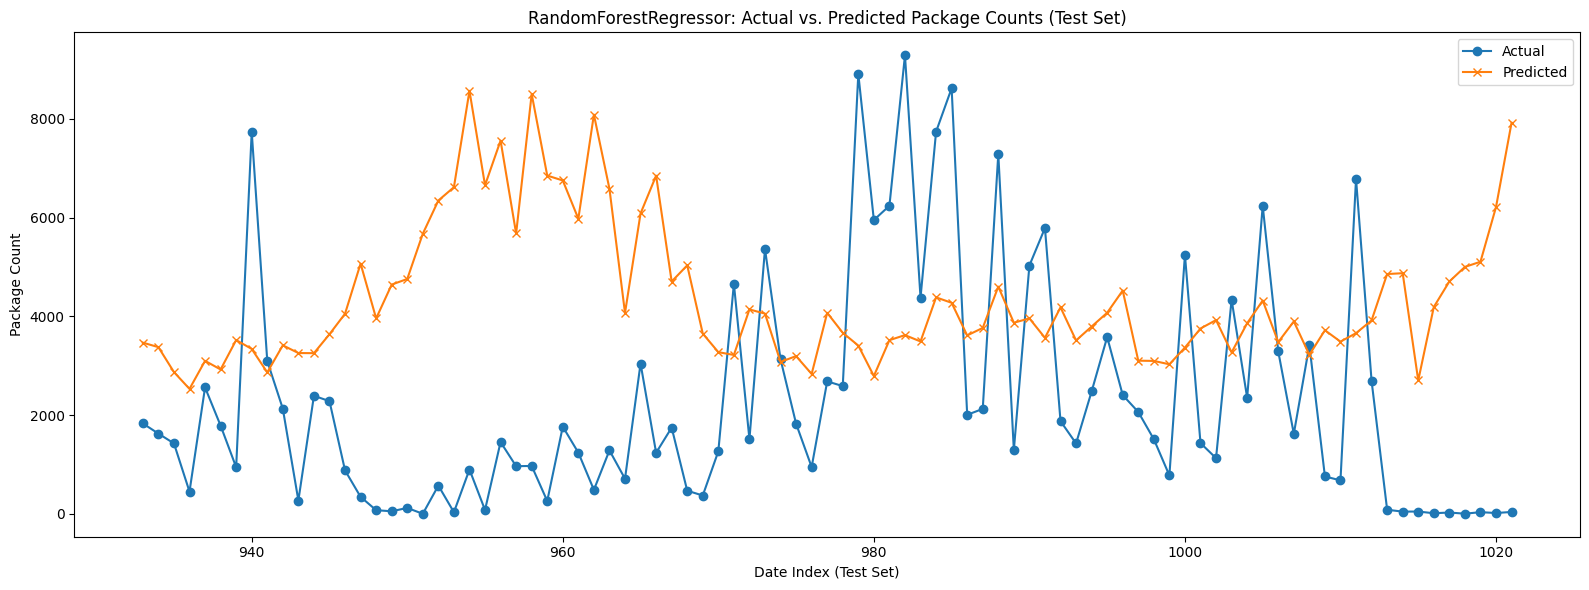

In [65]:
import matplotlib.pyplot as plt

# Reindex to get correct x-axis for dates if available
test_index = y_test.index[mask]

plt.figure(figsize=(16, 6))
plt.plot(test_index, y_test_valid, label='Actual', marker='o')
plt.plot(test_index, y_pred_valid, label='Predicted', marker='x')
plt.xlabel('Date Index (Test Set)')
plt.ylabel('Package Count')
plt.title('RandomForestRegressor: Actual vs. Predicted Package Counts (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()


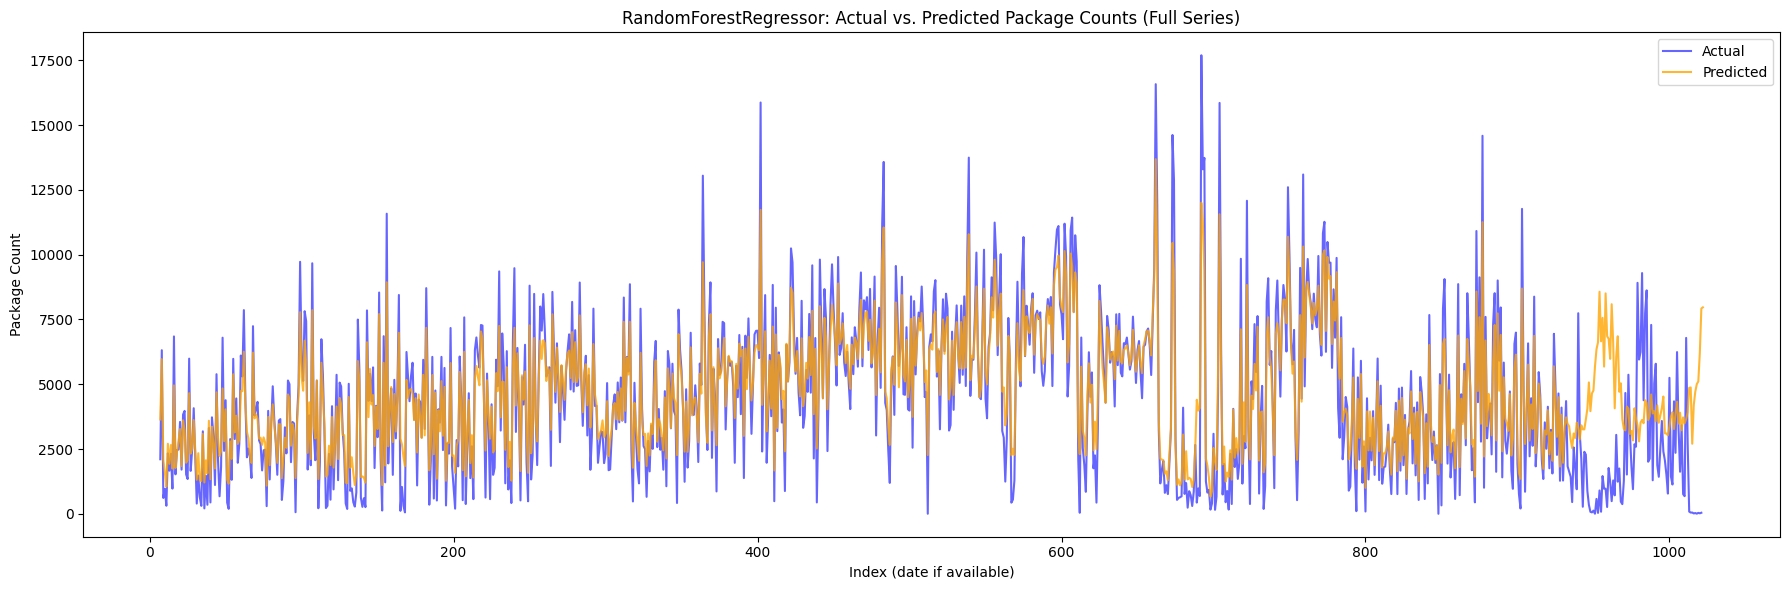

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Only use rows with no NaN in features
mask_all = ~X.isna().any(axis=1)
X_full = X[mask_all]
y_full = y.loc[X_full.index]

# Predict for entire series (train + test)
y_pred_full = model.predict(X_full)

# Plot full series
plt.figure(figsize=(18,6))
plt.plot(y_full.index, y_full, label='Actual', color='blue', alpha=0.6)
plt.plot(y_full.index, y_pred_full, label='Predicted', color='orange', alpha=0.8)
plt.xlabel('Index (date if available)')
plt.ylabel('Package Count')
plt.title('RandomForestRegressor: Actual vs. Predicted Package Counts (Full Series)')
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
import numpy as np

# Make sure to only use rows in X_train and y_train with no NaNs
mask_train = ~X_train.isna().any(axis=1) & ~y_train.isna()
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]

# Predict on training set
y_train_pred = model.predict(X_train_clean)

# Calculate MAE and RMSE for train set
mae_train = np.mean(np.abs(y_train_clean.values - y_train_pred))
rmse_train = np.sqrt(np.mean((y_train_clean.values - y_train_pred) ** 2))

print(f"Train MAE: {mae_train:.1f}")
print(f"Train RMSE: {rmse_train:.1f}")


Train MAE: 751.5
Train RMSE: 993.2


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Remove all rows with any NA (after shifting/lagging)
valid_mask = (~X.isna().any(axis=1)) & (~y.isna())
X_valid = X[valid_mask]
y_valid = y[valid_mask]

# Random train/test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_valid, y_valid, test_size=0.2, random_state=42, shuffle=True
)

# Train the model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate
mae_train = np.mean(np.abs(y_train.values - y_train_pred))
rmse_train = np.sqrt(np.mean((y_train.values - y_train_pred) ** 2))
mae_test = np.mean(np.abs(y_test.values - y_test_pred))
rmse_test = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))

print(f"Train MAE: {mae_train:.1f}")
print(f"Train RMSE: {rmse_train:.1f}")
print(f"Test MAE: {mae_test:.1f}")
print(f"Test RMSE: {rmse_test:.1f}")

# Feature importance (optional)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nTop 10 Features by Importance:")
for i in range(10):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Train MAE: 741.7
Train RMSE: 967.8
Test MAE: 1923.1
Test RMSE: 2553.6

Top 10 Features by Importance:
rolling7_SG_lag1: 0.2752
china_rolling7_std_lag1: 0.0460
rolling7_CZ_lag1: 0.0336
FR_lag1: 0.0296
day_of_week: 0.0282
share_MY_lag1: 0.0280
lag3: 0.0276
lag2: 0.0267
lag5: 0.0257
rolling30_lag1: 0.0247


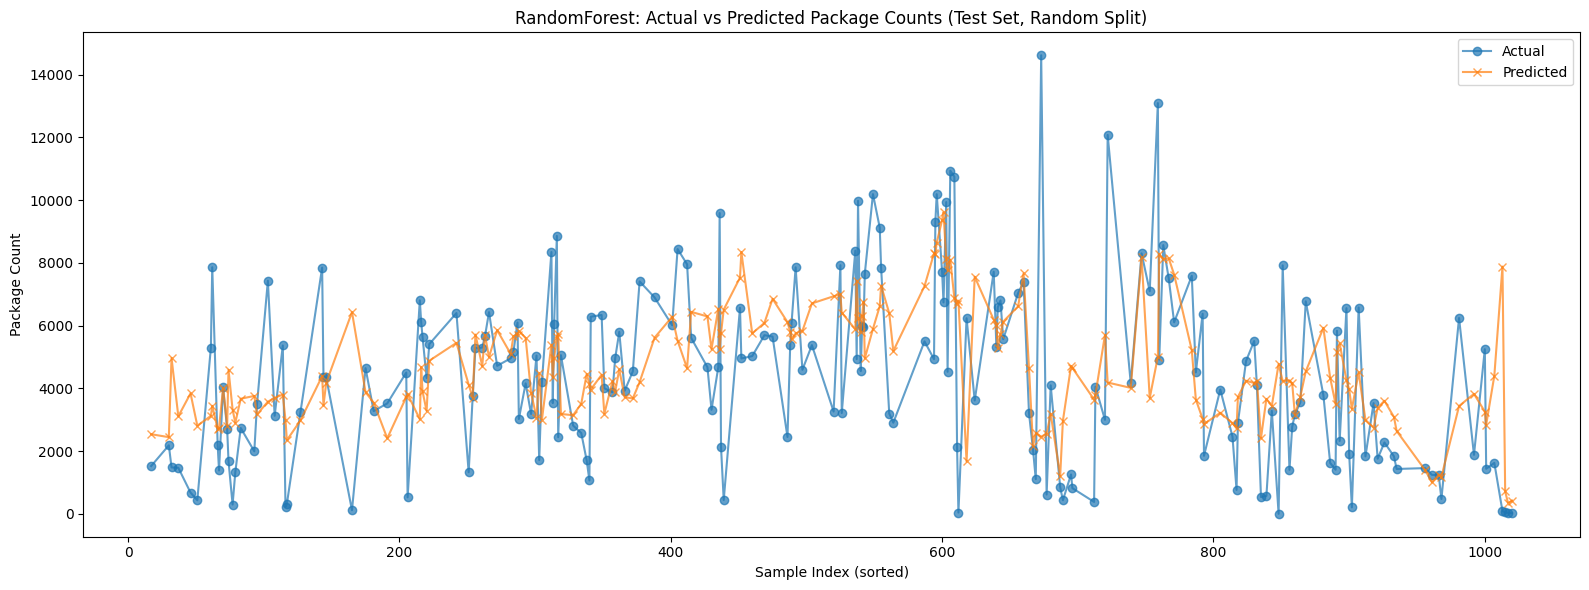

In [69]:
import matplotlib.pyplot as plt

# Sort test set by index so the plot is not “scrambled”
sorted_idx = np.argsort(X_test.index)
X_test_sorted = X_test.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_test_pred_sorted = y_test_pred[sorted_idx]

plt.figure(figsize=(16,6))
plt.plot(y_test_sorted.index, y_test_sorted.values, label='Actual', marker='o', alpha=0.7)
plt.plot(y_test_sorted.index, y_test_pred_sorted, label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Package Count')
plt.title('RandomForest: Actual vs Predicted Package Counts (Test Set, Random Split)')
plt.legend()
plt.tight_layout()
plt.show()


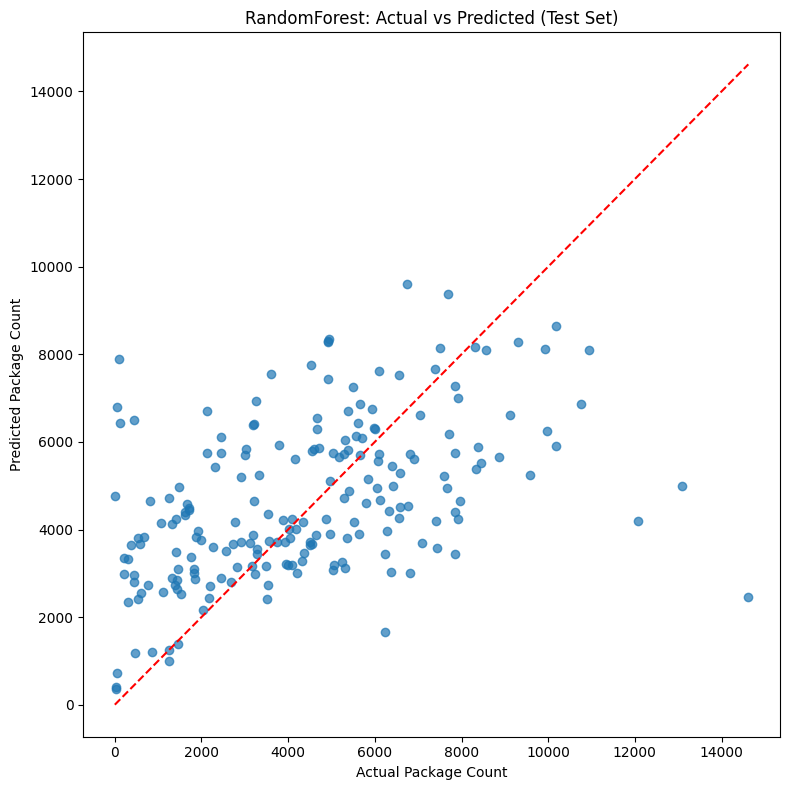

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test_sorted, y_test_pred_sorted, alpha=0.7)
plt.xlabel('Actual Package Count')
plt.ylabel('Predicted Package Count')
plt.title('RandomForest: Actual vs Predicted (Test Set)')
plt.plot([y_test_sorted.min(), y_test_sorted.max()],
         [y_test_sorted.min(), y_test_sorted.max()], 'r--')
plt.tight_layout()
plt.show()


In [71]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)


In [72]:
import numpy as np

mae_xgb = np.mean(np.abs(y_test.values - y_xgb_pred))
rmse_xgb = np.sqrt(np.mean((y_test.values - y_xgb_pred) ** 2))
print(f"XGBoost Test MAE: {mae_xgb:.1f}")
print(f"XGBoost Test RMSE: {rmse_xgb:.1f}")


XGBoost Test MAE: 2030.0
XGBoost Test RMSE: 2607.7


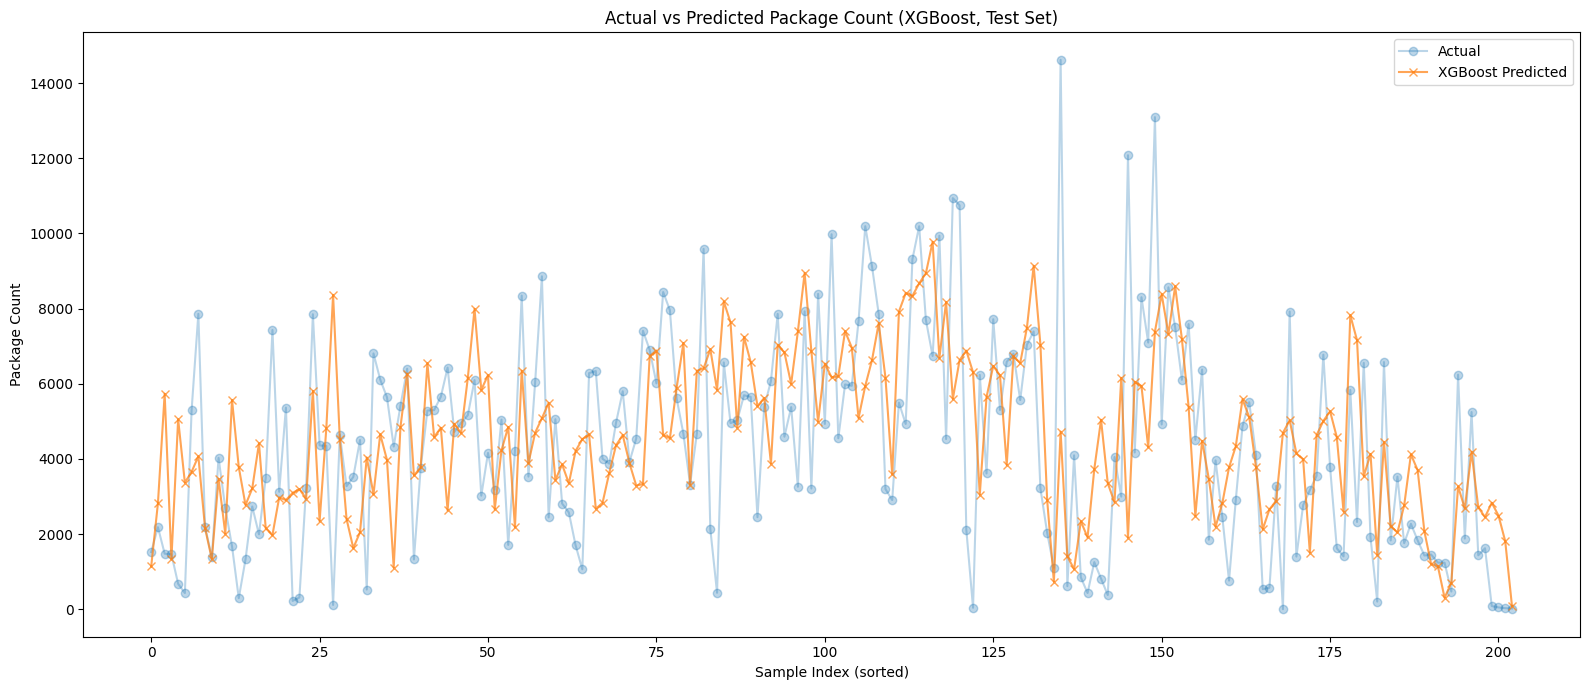

In [77]:
import matplotlib.pyplot as plt

# Sort by index for smooth plot
sorted_idx = np.argsort(X_test.index)
plt.figure(figsize=(16,7))
plt.plot(y_test.values[sorted_idx], label="Actual", marker='o', alpha=0.3)
plt.plot(y_xgb_pred[sorted_idx], label="XGBoost Predicted", marker='x', alpha=0.7)
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Package Count")
plt.title("Actual vs Predicted Package Count (XGBoost, Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


In [78]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Features by Importance (XGBoost):")
for i in range(10):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Top 10 Features by Importance (XGBoost):
rolling7_SG_lag1: 0.2540
weekofyear: 0.0743
rolling7_lag1: 0.0438
rolling30_lag1: 0.0422
rolling7_CZ_lag1: 0.0374
rolling14_lag1: 0.0293
share_CZ_lag1: 0.0267
share_AE_lag1: 0.0264
n_active_china_routes: 0.0239
AE_lag1: 0.0232


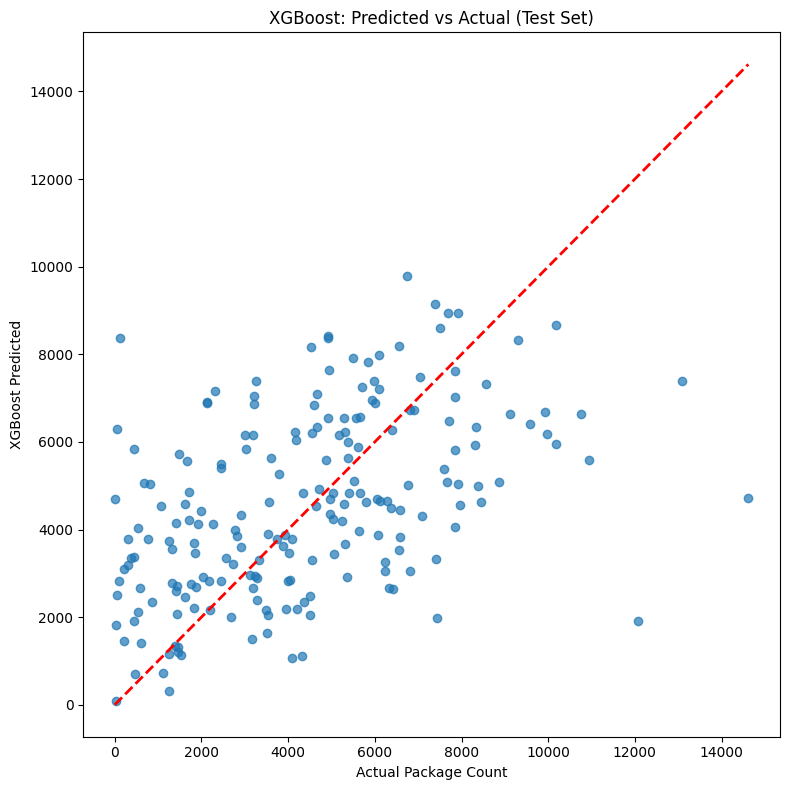

In [79]:
plt.figure(figsize=(8,8))
plt.scatter(y_test.values, y_xgb_pred, alpha=0.7)
plt.xlabel('Actual Package Count')
plt.ylabel('XGBoost Predicted')
plt.title('XGBoost: Predicted vs Actual (Test Set)')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.tight_layout()
plt.show()


In [80]:
# Use all but the last 120 samples for training, last 120 for testing
split_idx = -120
X_train, X_test = X_valid.iloc[:split_idx], X_valid.iloc[split_idx:]
y_train, y_test = y_valid.iloc[:split_idx], y_valid.iloc[split_idx:]

print(f"Train samples: {len(X_train)}, Test samples (last 120 days): {len(X_test)}")


Train samples: 895, Test samples (last 120 days): 120


In [81]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)


XGBoost (last 120 days) Test MAE: 2772.2
XGBoost (last 120 days) Test RMSE: 3551.8


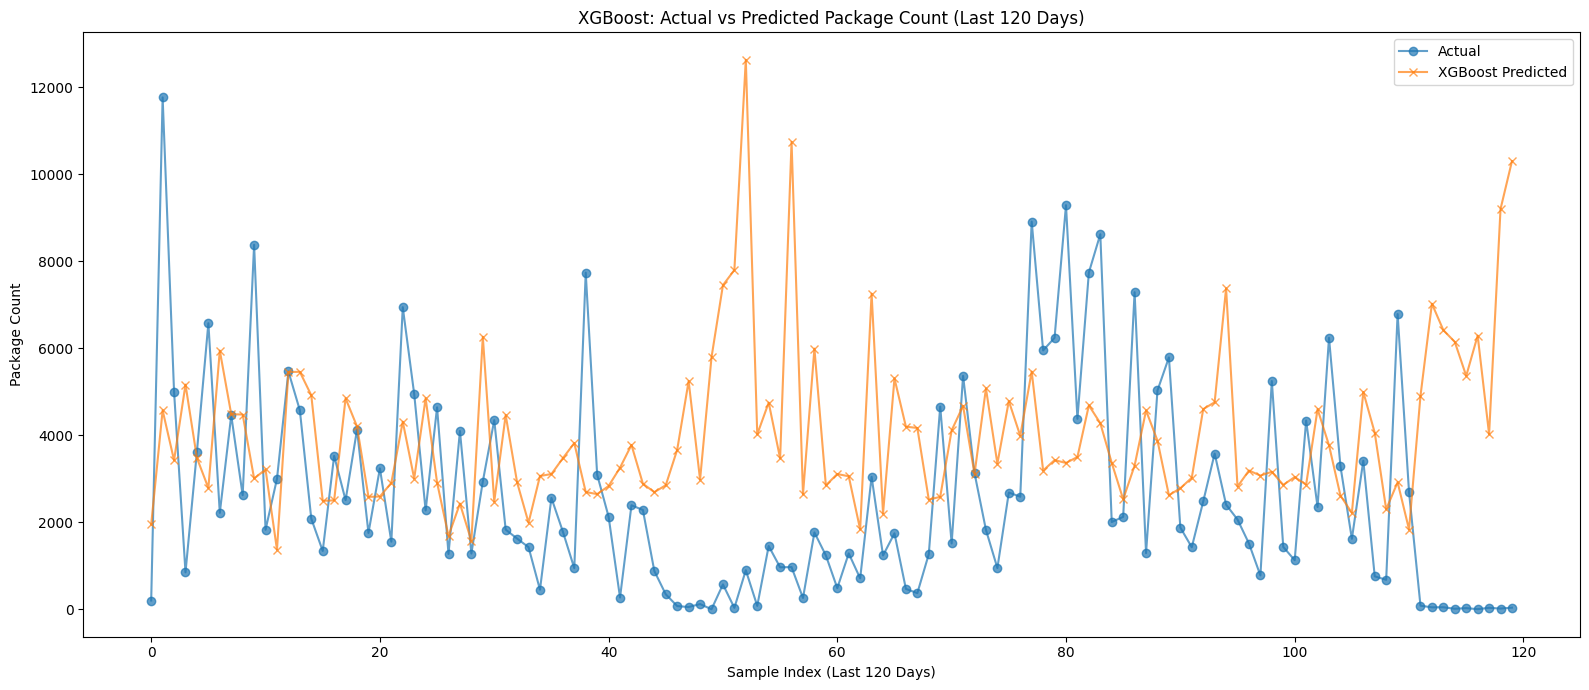

In [82]:
import numpy as np
import matplotlib.pyplot as plt

mae_xgb = np.mean(np.abs(y_test.values - y_xgb_pred))
rmse_xgb = np.sqrt(np.mean((y_test.values - y_xgb_pred) ** 2))
print(f"XGBoost (last 120 days) Test MAE: {mae_xgb:.1f}")
print(f"XGBoost (last 120 days) Test RMSE: {rmse_xgb:.1f}")

plt.figure(figsize=(16,7))
plt.plot(y_test.values, label="Actual", marker='o', alpha=0.7)
plt.plot(y_xgb_pred, label="XGBoost Predicted", marker='x', alpha=0.7)
plt.xlabel("Sample Index (Last 120 Days)")
plt.ylabel("Package Count")
plt.title("XGBoost: Actual vs Predicted Package Count (Last 120 Days)")
plt.legend()
plt.tight_layout()
plt.show()


In [83]:
import numpy as np

# Predict on both train and test
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Metrics
mae_train = np.mean(np.abs(y_train.values - y_train_pred))
rmse_train = np.sqrt(np.mean((y_train.values - y_train_pred) ** 2))
mae_test = np.mean(np.abs(y_test.values - y_test_pred))
rmse_test = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))

print(f"Train MAE: {mae_train:.1f}")
print(f"Train RMSE: {rmse_train:.1f}")
print(f"Test MAE: {mae_test:.1f}")
print(f"Test RMSE: {rmse_test:.1f}")


Train MAE: 0.1
Train RMSE: 0.2
Test MAE: 2772.2
Test RMSE: 3551.8


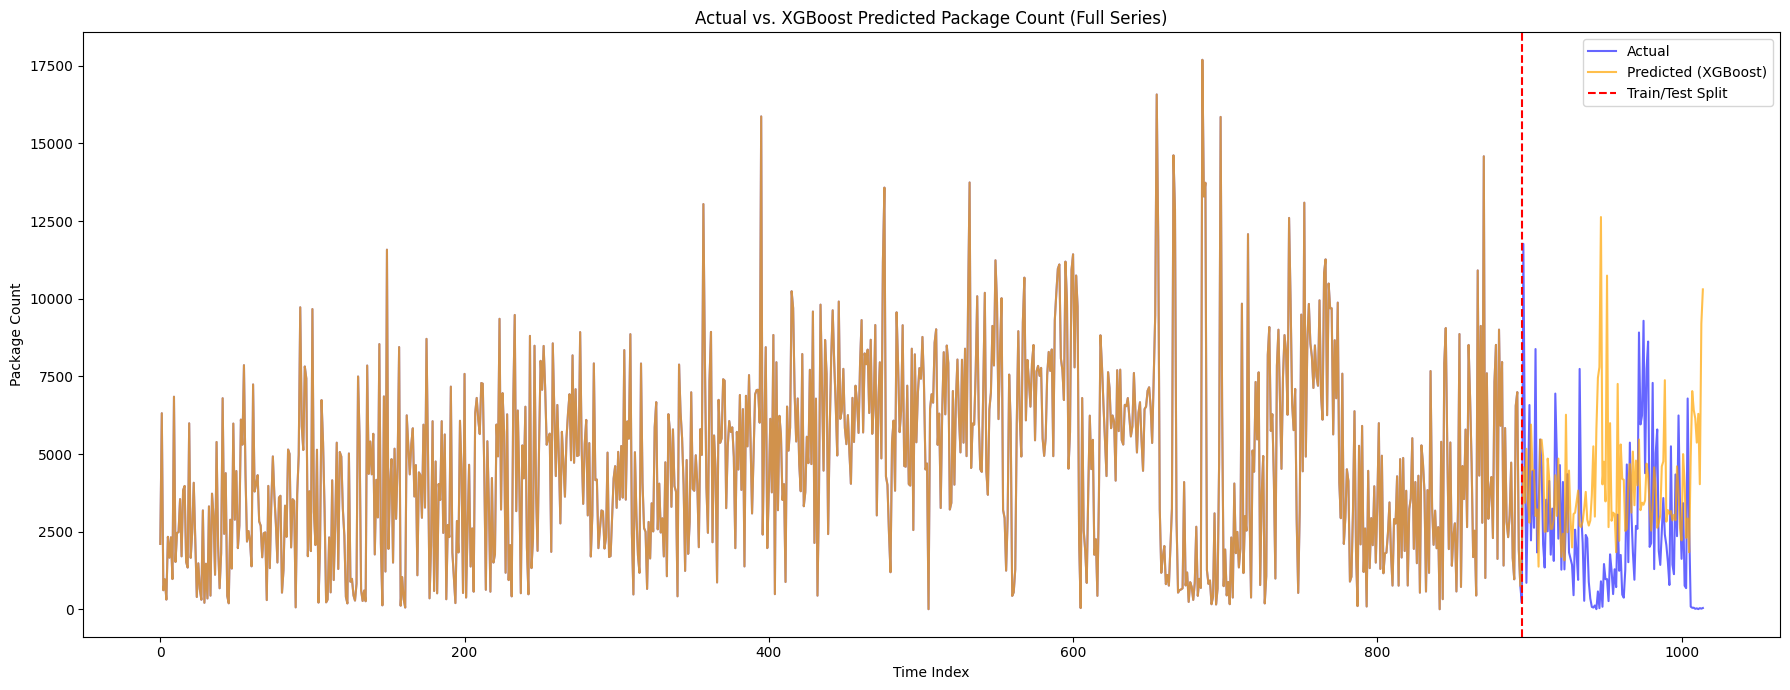

In [84]:
import matplotlib.pyplot as plt

# Get predicted values for the entire series (train + test)
y_full_pred = np.concatenate([y_train_pred, y_test_pred])
y_full = np.concatenate([y_train.values, y_test.values])

plt.figure(figsize=(18,7))
plt.plot(y_full, label='Actual', color='blue', alpha=0.6)
plt.plot(y_full_pred, label='Predicted (XGBoost)', color='orange', alpha=0.7)
plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Package Count')
plt.title('Actual vs. XGBoost Predicted Package Count (Full Series)')
plt.legend()
plt.tight_layout()
plt.show()


In [88]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,       # Fewer trees
    max_depth=6,            # Shallower trees (default is 6, try 4-8)
    min_child_weight=3,     # Needs more data to split
    gamma=2,                # Minimum loss reduction to split
    subsample=0.8,          # Use only 80% of rows per tree
    colsample_bytree=0.8,   # Use 80% of features per tree
    reg_alpha=1,            # L1 regularization
    reg_lambda=1,           # L2 regularization
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

print("Train/Test Errors (after tuning):")
print("Train MAE:", np.mean(np.abs(y_train - y_train_pred)))
print("Test MAE:", np.mean(np.abs(y_test - y_test_pred)))


Train/Test Errors (after tuning):
Train MAE: 22.88489607432701
Test MAE: 2541.107869720459


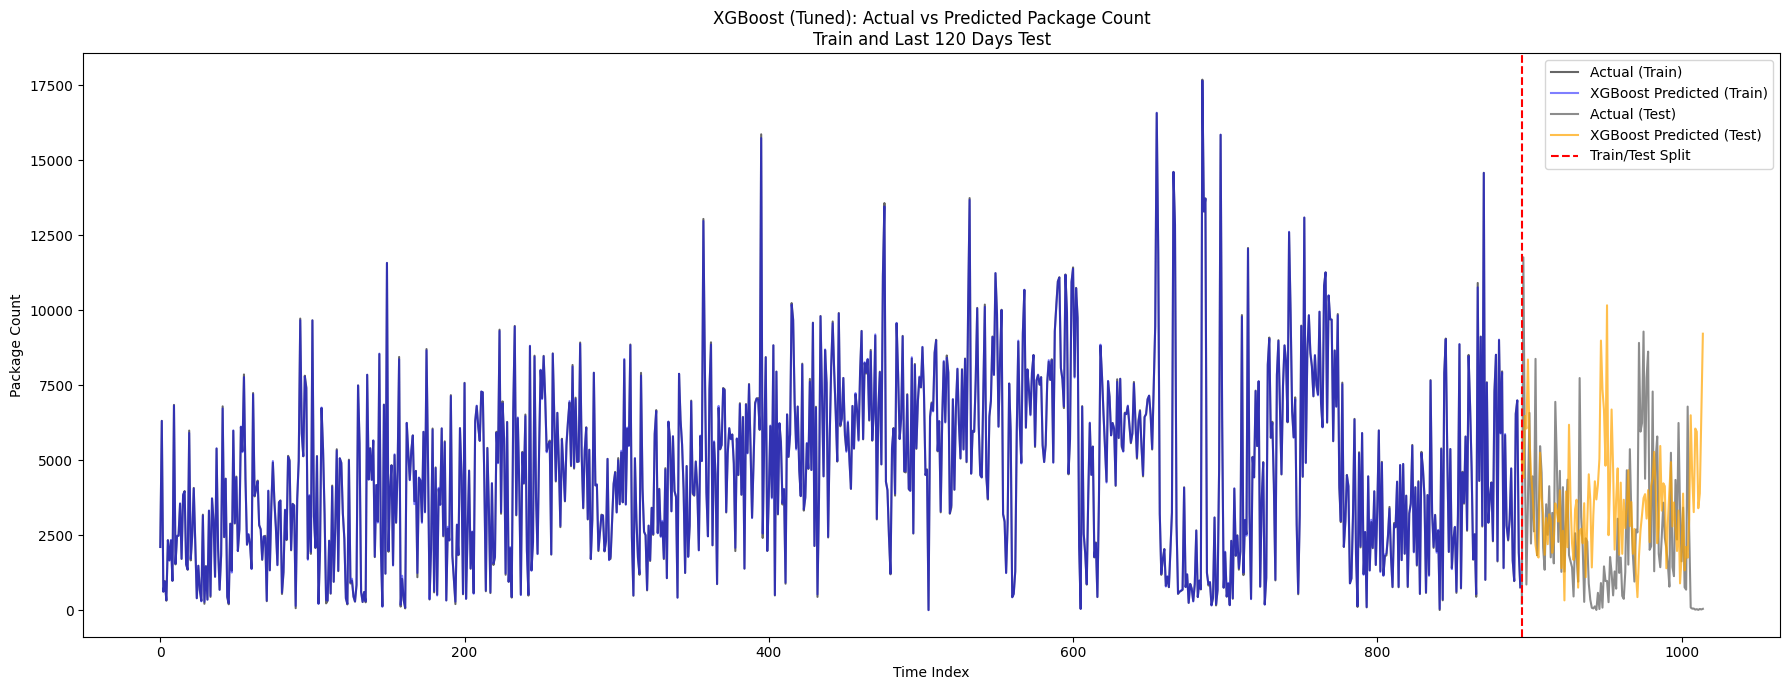

In [89]:
import matplotlib.pyplot as plt

# Predict on both train and test (after fitting your tuned xgb_model)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Plot full series: train (blue), test (orange), actual (black line)
plt.figure(figsize=(18,7))
plt.plot(np.arange(len(y_train)), y_train, label='Actual (Train)', color='black', alpha=0.6)
plt.plot(np.arange(len(y_train)), y_train_pred, label='XGBoost Predicted (Train)', color='blue', alpha=0.5)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Test)', color='gray', alpha=0.9)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred, label='XGBoost Predicted (Test)', color='orange', alpha=0.7)
plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Package Count')
plt.title('XGBoost (Tuned): Actual vs Predicted Package Count\nTrain and Last 120 Days Test')
plt.legend()
plt.tight_layout()
plt.show()


In [97]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=4,
    min_child_weight=8,
    gamma=6,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=2.0,
    reg_lambda=2.0,
    learning_rate=0.08,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Metrics
mae_train = np.mean(np.abs(y_train.values - y_train_pred))
rmse_train = np.sqrt(np.mean((y_train.values - y_train_pred) ** 2))
mae_test = np.mean(np.abs(y_test.values - y_test_pred))
rmse_test = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))

print(f"XGBoost (tuned) Train MAE: {mae_train:.1f}")
print(f"XGBoost (tuned) Train RMSE: {rmse_train:.1f}")
print(f"XGBoost (tuned) Test MAE: {mae_test:.1f}")
print(f"XGBoost (tuned) Test RMSE: {rmse_test:.1f}")


XGBoost (tuned) Train MAE: 1177.2
XGBoost (tuned) Train RMSE: 1529.1
XGBoost (tuned) Test MAE: 2583.6
XGBoost (tuned) Test RMSE: 3215.0


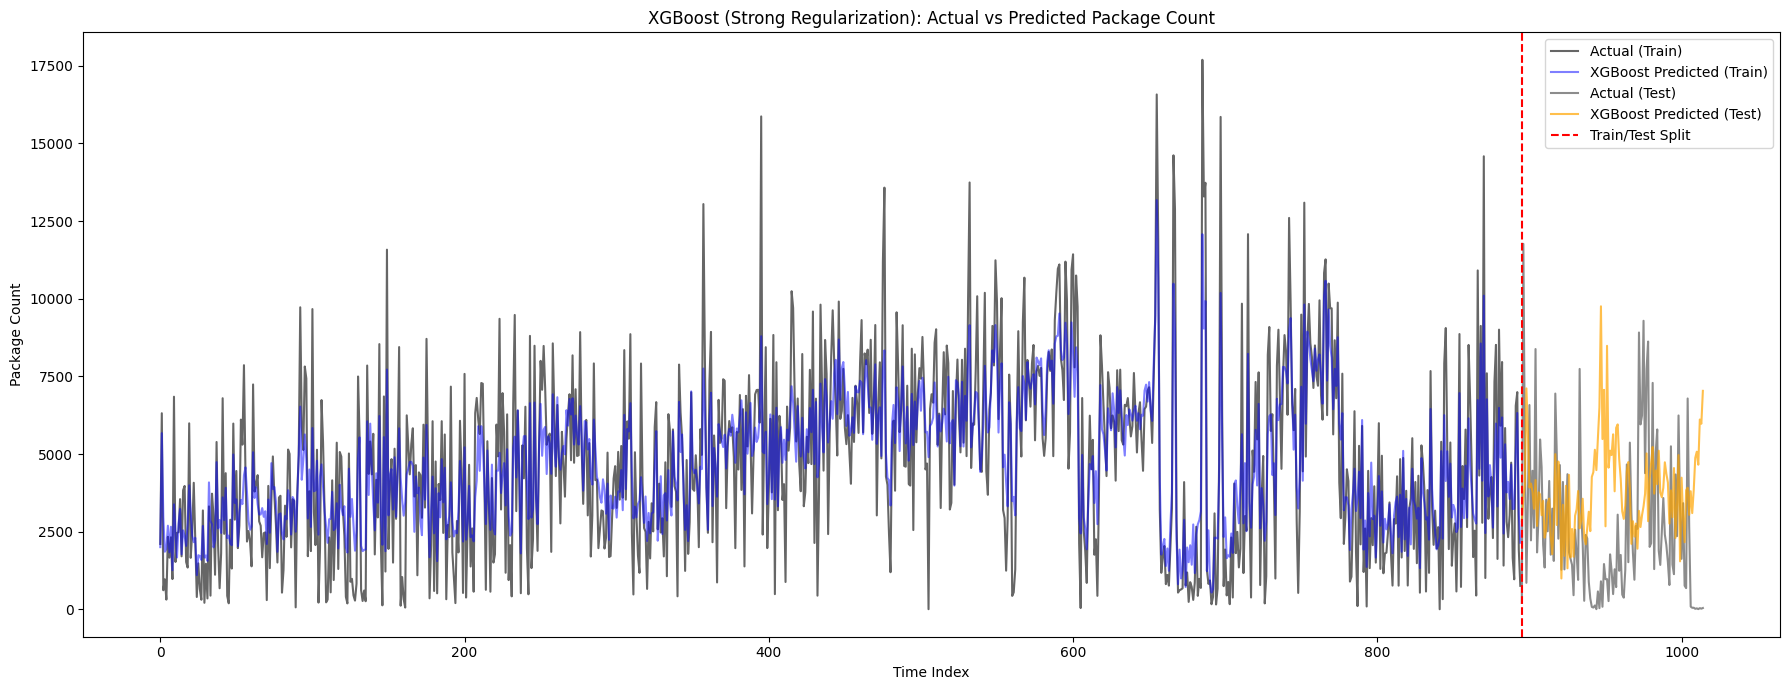

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.plot(np.arange(len(y_train)), y_train, label='Actual (Train)', color='black', alpha=0.6)
plt.plot(np.arange(len(y_train)), y_train_pred, label='XGBoost Predicted (Train)', color='blue', alpha=0.5)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Test)', color='gray', alpha=0.9)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred, label='XGBoost Predicted (Test)', color='orange', alpha=0.7)
plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Package Count')
plt.title('XGBoost (Strong Regularization): Actual vs Predicted Package Count')
plt.legend()
plt.tight_layout()
plt.show()


In [98]:
from sklearn.linear_model import Lasso
import numpy as np

# Alpha controls strength of regularization; try 1.0, 2.0, 5.0, etc.
lasso = Lasso(alpha=2.0, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Metrics
mae_train_lasso = np.mean(np.abs(y_train - y_train_pred_lasso))
rmse_train_lasso = np.sqrt(np.mean((y_train - y_train_pred_lasso) ** 2))
mae_test_lasso = np.mean(np.abs(y_test - y_test_pred_lasso))
rmse_test_lasso = np.sqrt(np.mean((y_test - y_test_pred_lasso) ** 2))

print(f"Lasso Train MAE: {mae_train_lasso:.1f}")
print(f"Lasso Train RMSE: {rmse_train_lasso:.1f}")
print(f"Lasso Test MAE: {mae_test_lasso:.1f}")
print(f"Lasso Test RMSE: {rmse_test_lasso:.1f}")


Lasso Train MAE: 1971.6
Lasso Train RMSE: 2537.8
Lasso Test MAE: 2412.4
Lasso Test RMSE: 3558.6


d:\program inst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e+09, tolerance: 8.169e+05
  model = cd_fast.enet_coordinate_descent(


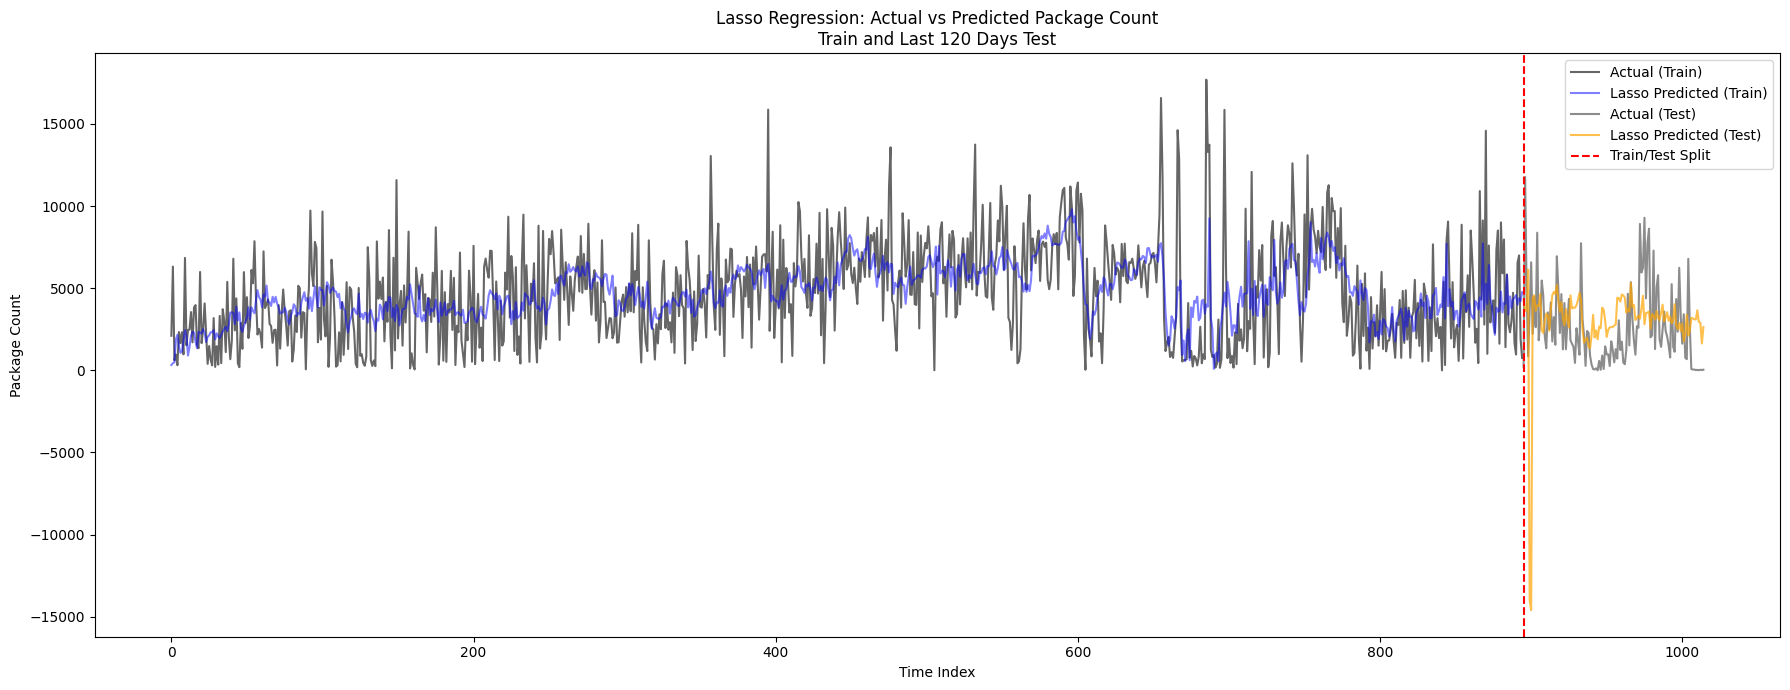

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.plot(np.arange(len(y_train)), y_train, label='Actual (Train)', color='black', alpha=0.6)
plt.plot(np.arange(len(y_train)), y_train_pred_lasso, label='Lasso Predicted (Train)', color='blue', alpha=0.5)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Test)', color='gray', alpha=0.9)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred_lasso, label='Lasso Predicted (Test)', color='orange', alpha=0.7)
plt.axvline(x=len(y_train), color='red', linestyle='--', label='Train/Test Split')
plt.xlabel('Time Index')
plt.ylabel('Package Count')
plt.title('Lasso Regression: Actual vs Predicted Package Count\nTrain and Last 120 Days Test')
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np

# Re-clean if needed (to be safe)
valid_mask = (~X.isna().any(axis=1)) & (~y.isna())
X_valid = X[valid_mask]
y_valid = y[valid_mask]

# Random 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_valid, y_valid, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")


Train samples: 812, Test samples: 203


In [101]:
lasso = Lasso(alpha=2.0, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

mae_train_lasso = np.mean(np.abs(y_train - y_train_pred_lasso))
rmse_train_lasso = np.sqrt(np.mean((y_train - y_train_pred_lasso) ** 2))
mae_test_lasso = np.mean(np.abs(y_test - y_test_pred_lasso))
rmse_test_lasso = np.sqrt(np.mean((y_test - y_test_pred_lasso) ** 2))

print(f"Lasso Train MAE: {mae_train_lasso:.1f}")
print(f"Lasso Train RMSE: {rmse_train_lasso:.1f}")
print(f"Lasso Test MAE: {mae_test_lasso:.1f}")
print(f"Lasso Test RMSE: {rmse_test_lasso:.1f}")


Lasso Train MAE: 1970.8
Lasso Train RMSE: 2536.7
Lasso Test MAE: 1957.8
Lasso Test RMSE: 2489.3


d:\program inst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+08, tolerance: 7.682e+05
  model = cd_fast.enet_coordinate_descent(


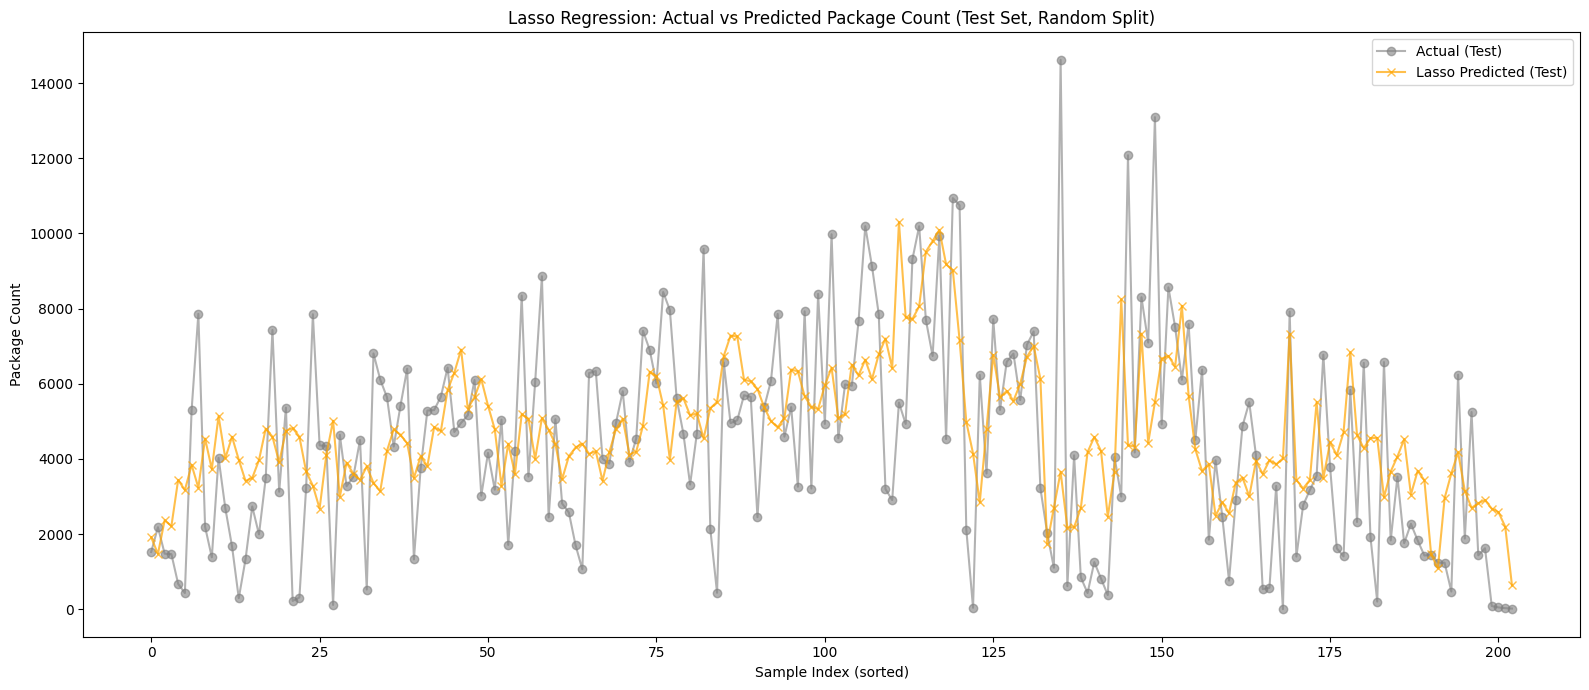

In [102]:
import matplotlib.pyplot as plt

# For nice plot, sort by test index
sorted_idx = np.argsort(X_test.index)
plt.figure(figsize=(16,7))
plt.plot(y_test.values[sorted_idx], label='Actual (Test)', color='gray', marker='o', alpha=0.6)
plt.plot(y_test_pred_lasso[sorted_idx], label='Lasso Predicted (Test)', color='orange', marker='x', alpha=0.7)
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Package Count")
plt.title("Lasso Regression: Actual vs Predicted Package Count (Test Set, Random Split)")
plt.legend()
plt.tight_layout()
plt.show()


In [107]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2.0, max_iter=10000, random_state=42)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

mae_train_ridge = np.mean(np.abs(y_train - y_train_pred_ridge))
rmse_train_ridge = np.sqrt(np.mean((y_train - y_train_pred_ridge) ** 2))
mae_test_ridge = np.mean(np.abs(y_test - y_test_pred_ridge))
rmse_test_ridge = np.sqrt(np.mean((y_test - y_test_pred_ridge) ** 2))

print(f"Ridge Train MAE: {mae_train_ridge:.1f}")
print(f"Ridge Train RMSE: {rmse_train_ridge:.1f}")
print(f"Ridge Test MAE: {mae_test_ridge:.1f}")
print(f"Ridge Test RMSE: {rmse_test_ridge:.1f}")


Ridge Train MAE: 1969.9
Ridge Train RMSE: 2536.6
Ridge Test MAE: 1951.9
Ridge Test RMSE: 2485.4


In [108]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=2.0, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic.fit(X_train, y_train)
y_train_pred_elastic = elastic.predict(X_train)
y_test_pred_elastic = elastic.predict(X_test)

mae_train_elastic = np.mean(np.abs(y_train - y_train_pred_elastic))
rmse_train_elastic = np.sqrt(np.mean((y_train - y_train_pred_elastic) ** 2))
mae_test_elastic = np.mean(np.abs(y_test - y_test_pred_elastic))
rmse_test_elastic = np.sqrt(np.mean((y_test - y_test_pred_elastic) ** 2))

print(f"ElasticNet Train MAE: {mae_train_elastic:.1f}")
print(f"ElasticNet Train RMSE: {rmse_train_elastic:.1f}")
print(f"ElasticNet Test MAE: {mae_test_elastic:.1f}")
print(f"ElasticNet Test RMSE: {rmse_test_elastic:.1f}")


ElasticNet Train MAE: 2001.3
ElasticNet Train RMSE: 2576.8
ElasticNet Test MAE: 1949.6
ElasticNet Test RMSE: 2474.3


d:\program inst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+09, tolerance: 7.682e+05
  model = cd_fast.enet_coordinate_descent(


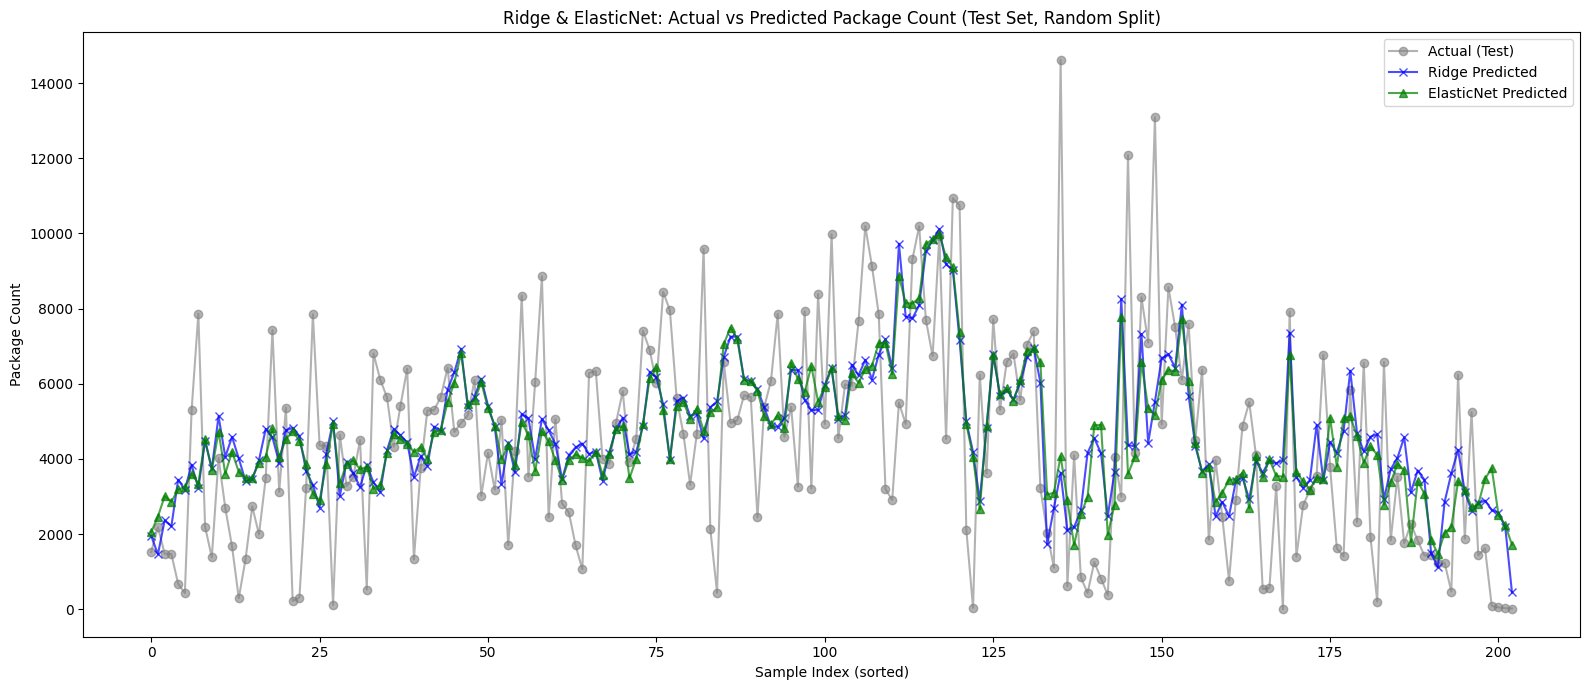

In [109]:
# Sort y_test and all predictions by the test index
sort_idx = np.argsort(y_test.index)

y_test_sorted = y_test.values[sort_idx]
y_test_pred_ridge_sorted = y_test_pred_ridge[sort_idx]
y_test_pred_elastic_sorted = y_test_pred_elastic[sort_idx]

plt.figure(figsize=(16,7))
plt.plot(y_test_sorted, label='Actual (Test)', color='gray', marker='o', alpha=0.6)
plt.plot(y_test_pred_ridge_sorted, label='Ridge Predicted', color='blue', marker='x', alpha=0.7)
plt.plot(y_test_pred_elastic_sorted, label='ElasticNet Predicted', color='green', marker='^', alpha=0.7)
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Package Count")
plt.title("Ridge & ElasticNet: Actual vs Predicted Package Count (Test Set, Random Split)")
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2.0, max_iter=10000, random_state=42)
ridge.fit(X_train, y_train)

# ElasticNet
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=2.0, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic.fit(X_train, y_train)


d:\program inst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+09, tolerance: 7.682e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=2.0, max_iter=10000, random_state=42)

In [112]:
# Predict on test set
xgb_pred = xgb_model.predict(X_test)
ridge_pred = ridge.predict(X_test)
elastic_pred = elastic.predict(X_test)

# Stack predictions into new feature matrix
import numpy as np
stacked_preds = np.vstack([xgb_pred, ridge_pred, elastic_pred]).T
print(stacked_preds.shape)  # Should be (n_samples, 3)


(203, 3)


In [113]:
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
meta_model.fit(stacked_preds, y_test)  # Note: Using y_test here for simplicity (proper stacking uses cross-validation!)

meta_pred = meta_model.predict(stacked_preds)

mae_meta = np.mean(np.abs(y_test - meta_pred))
rmse_meta = np.sqrt(np.mean((y_test - meta_pred) ** 2))
print(f"Stacked Model Test MAE: {mae_meta:.1f}")
print(f"Stacked Model Test RMSE: {rmse_meta:.1f}")
print("Meta-model weights (for each base model):", meta_model.coef_)


Stacked Model Test MAE: 1897.3
Stacked Model Test RMSE: 2429.1
Meta-model weights (for each base model): [0.21103092 0.3618761  0.30541175]


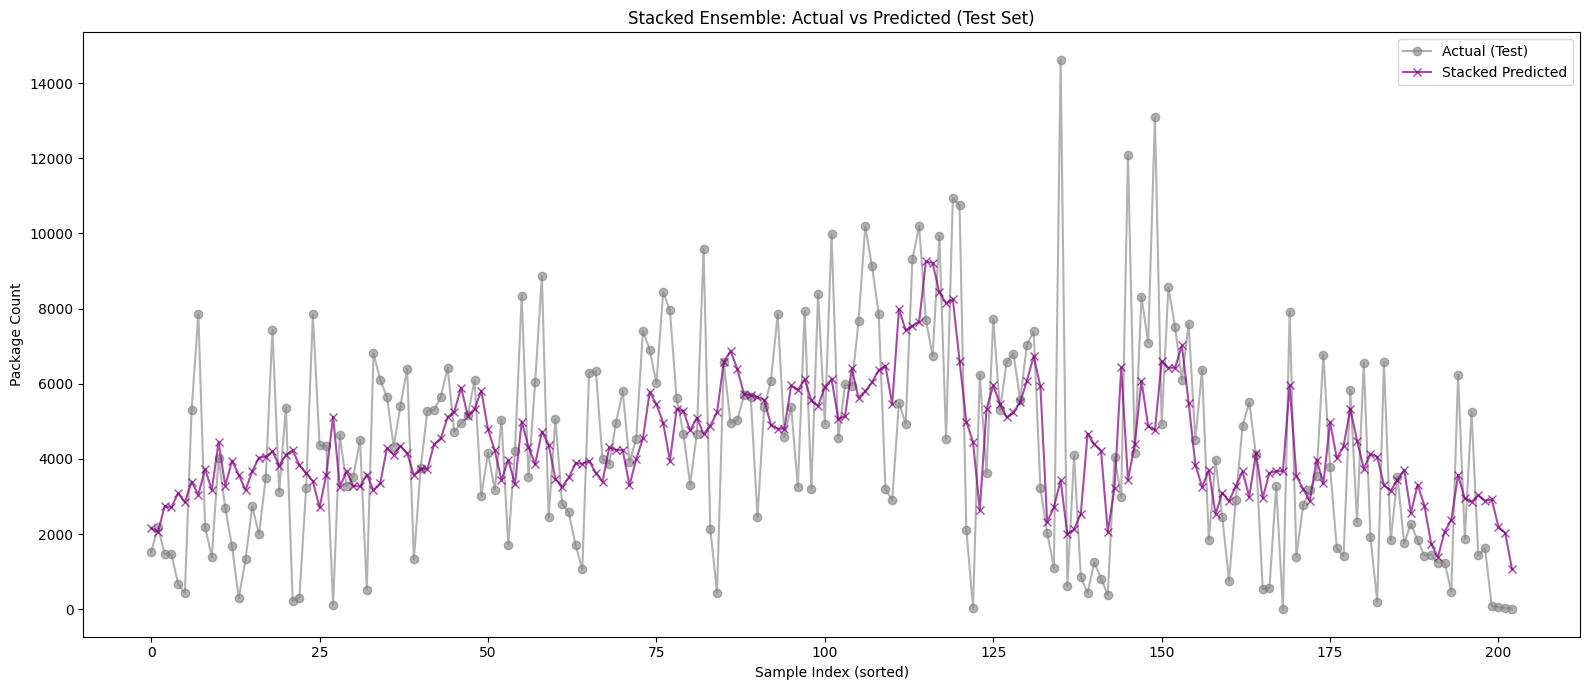

In [114]:
import matplotlib.pyplot as plt

# Sort test set by index for nice plotting
sort_idx = np.argsort(X_test.index)
plt.figure(figsize=(16,7))
plt.plot(y_test.values[sort_idx], label='Actual (Test)', color='gray', marker='o', alpha=0.6)
plt.plot(meta_pred[sort_idx], label='Stacked Predicted', color='purple', marker='x', alpha=0.7)
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Package Count")
plt.title("Stacked Ensemble: Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()
